# <center>NBA Players of the Week - Explanatory Visual Analysis</center>
<br>
<center>Created: 10/27/2018<br>
Latest Update: 10/28/2018<br>
By: Can Bekleyici - bekleydata.com<br></center>

## Table of Contents
- [Part I - Visual Data Analysis](#vda)
- [Part II - Looking at the Distributions](#look)
- [Part III - Age, Height, Weight, and Draft Year Distributions](#ahw)
- [Part IV - Distribution of Positions](#pos)
- [Part V - What are the Relations?](#relations)
- [Part VI - BMI by Position](#bmi)
- [Part VII - How does these relations change over time?](#muli)
- [Part VIII - Players Weight on Height by Years](#weightheight)
- [Part IX - BMI Distribution for each Position over Time](#bmitime)
- [Part X - Conclusion](#con)

<a id='into'></a>
# Introduction
For this project, I explored a <a href="https://www.kaggle.com/jacobbaruch/nba-player-of-the-week">dataset from kaggle</a>, which contains every Player of the Week awarded between the NBA seasons 1984/85 and 2017/18. After shortly assessing and cleaning the dataset, I started exploring the data by using a variety of visualisations and techniques (as feature engineering). Upon finishing the exploration, I polished the visualizations for presentation purposes and turned them into slide decks.

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# toggle option for slides
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
# read csv into data frame
df = pd.read_csv('NBA_player_of_the_week.csv')
df.head()

,Age,Conference,Date,Draft Year,Height,Player,Position,Season,Season short,Seasons in league,Team,Weight,Real_value
0,29,NaN,"Apr 14, 1985",1978,6-5,Micheal Ray Richardson,PG,1984-1985,1985,6,New Jersey Nets,189,1.0
1,23,NaN,"Apr 7, 1985",1982,6-6,Derek Smith,SG,1984-1985,1985,2,Los Angeles Clippers,205,1.0
2,28,NaN,"Apr 1, 1985",1979,6-6,Calvin Natt,F,1984-1985,1985,5,Denver Nuggets,220,1.0
3,37,NaN,"Mar 24, 1985",1969,7-2,Kareem Abdul-Jabbar,C,1984-1985,1985,15,Los Angeles Lakers,225,1.0
4,28,NaN,"Mar 17, 1985",1978,6-9,Larry Bird,SF,1984-1985,1985,5,Boston Celtics,220,1.0


In [4]:
print(df.info())
print("Rows and Columns:   " + str(df.shape))
print("Duplicated Player names:   " + str(df.Player.duplicated().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1145 entries, 0 to 1144
Data columns (total 13 columns):
Age                  1145 non-null int64
Conference           761 non-null object
Date                 1145 non-null object
Draft Year           1145 non-null int64
Height               1145 non-null object
Player               1145 non-null object
Position             1145 non-null object
Season               1145 non-null object
Season short         1145 non-null int64
Seasons in league    1145 non-null int64
Team                 1145 non-null object
Weight               1145 non-null object
Real_value           1145 non-null float64
dtypes: float64(1), int64(4), object(8)
memory usage: 116.4+ KB
None
Rows and Columns:   (1145, 13)
Duplicated Player names:   871


<a id='assessment'></a>
# I.a. Assessments

Upon a quick visual and programatic assessment, the following tidiness and quality issues of the dataset have been identified:
- `Conference` column contains NaN's
- `height` and `weight` colums are not nummeric
- `season` and `season short` columns are repetitive
- `date` column is not datetime formatted
- (Players are duplicated in the dataset (because they can be awarded multiple times))

<a id='cleaning'></a>
# I.b. Cleaning
- Fill NaN's with the value 'All'
- Convert height and weight values into metric and numeric
- Delete season column and convert date column into a datetime format
- Create a second dataframe with only containing unique players data for additional analysis

In [5]:
# replaces NaN's with 'All'
df['Conference'].replace(np.nan, "All", inplace=True)

In [6]:
# test
df.Conference.value_counts()

All     384
East    381
West    380
Name: Conference, dtype: int64

In [7]:
# standardize and convert weight to integers
df['Weight'] = [int(i.replace('kg', '')) * 2.205 if 'kg' in i else int(i) for i in df['Weight']]

# turn weight from pound to kilogram
df['Weight'] = (df['Weight'] / 2.205).round(0)

In [8]:
# convert heights into numeric with centimeter units
df['Height'] = [(int(i[0])*12*2.54 + int(i[1])*2.54) if 'cm' not in i[0] 
                else int(i[0].replace('cm', '')) for i in df['Height'].str.split('-')]

# round to next integers
df['Height'] = df['Height'].round(0)

In [9]:
# test Weight column
df['Weight'].sort_values(ascending=False).unique()

array([147., 141., 139., 131., 129., 127., 122., 121., 120., 118., 117.,
       116., 115., 114., 113., 112., 111., 110., 109., 107., 106., 105.,
       104., 103., 102., 101., 100.,  99.,  98.,  96.,  95.,  94.,  93.,
        91.,  90.,  89.,  88.,  87.,  86.,  85.,  84.,  83.,  82.,  81.,
        79.,  77.,  76.,  75.,  74.,  68.])

In [10]:
# test Height column
df['Height'].sort_values(ascending=False).unique()

array([229., 224., 221., 218., 216., 213., 211., 208., 206., 203., 201.,
       198., 196., 193., 191., 190., 188., 185., 183., 180., 178., 175.])

In [11]:
# drop season column
df.drop(columns=['Season'], axis=1, inplace=True)

In [12]:
# test
df.columns

Index(['Age', 'Conference', 'Date', 'Draft Year', 'Height', 'Player',
       'Position', 'Season short', 'Seasons in league', 'Team', 'Weight',
       'Real_value'],
      dtype='object')

In [13]:
# convert date column to a datetime format
df['Date'] = pd.to_datetime(df['Date'],infer_datetime_format=True)

In [14]:
# test
df['Date'].dtype

dtype('<M8[ns]')

In [15]:
# create a second dataframe with only unique player data
df2 = df.groupby(['Player', 'Position', 'Draft Year']).size().reset_index(name='POTW Counts')
df2 = df2.merge(df.groupby(['Player'])['Age', 'Height', 'Weight'].median(), on='Player', how='inner')

In [16]:
# test
df2

,Player,Position,Draft Year,POTW Counts,Age,Height,Weight
0,Aaron McKie,G,1994,1,28.0,196.0,95.0
1,Adrian Dantley,SF,1976,1,30.0,196.0,94.0
2,Al Harrington,F,1998,1,29.0,206.0,111.0
3,Al Horford,FC,2007,3,28.0,208.0,111.0
4,Al Jefferson,FC,2004,7,27.0,208.0,131.0
5,Alex English,SF,1976,4,32.0,201.0,86.0
6,Allan Houston,G,1993,1,31.0,198.0,93.0
7,Allen Iverson,G,1996,23,28.0,183.0,75.0
8,Alonzo Mourning,C,1992,6,28.5,208.0,109.0
9,Alvin Robertson,SG,1984,3,24.0,190.0,84.0


In [17]:
# save the cleaned dataframes
df.to_csv('NBA_potw_clean.csv', index=False)
df2.to_csv('NBA_potw_clean2.csv', index=False)

<a id='vda'></a>
# Visual Data Analysis

For this project, I explored a <a href="https://www.kaggle.com/jacobbaruch/nba-player-of-the-week">dataset from kaggle</a>, which contains every Player of the Week awarded between the NBA seasons 1984/85 and 2017/18. I focused heavily on visual data exploration and divided them into three stages of exploratory iteration.

In [18]:
df = pd.read_csv('NBA_potw_clean.csv')
df2 = pd.read_csv('NBA_potw_clean2.csv')

<a id='look'></a>
# Looking at the Distributions

I inspected to distributions in the ages, weights, and heights of the unique players, which have been awarded player of the week at least once, and the player positions of every PotW choice in the dataset. Are there any patterns or oddities in the distributions?

In [19]:
# Defines function for histograms
def subplots(dataframe, index, column, column_label, min_bin=0, max_bin=10, bin_intervall=1):
    plt.subplot(2, 2, index)
    bins = np.arange(min_bin, max_bin + bin_intervall, bin_intervall)
    plt.hist(data=dataframe, x=column, bins=bins, color='#2b3f48')
    plt.title("{} Distribution of all Players of the Week's".format(column), fontdict={'size':13})
    plt.xlabel(column_label, fontsize=12)
    plt.ylabel('Amount', fontsize=12)
    plt.subplots_adjust(top=1.1)

<a id="ahw"></a>
## Age, Height, Weight, and Draft Year Distributions
Looking at the modes, the most awarded fictional player would be 25 years old, about 205-210 centimeters tall, and would weigh between 100-105 kilograms. Ideally, he would have been drafted around 1985 or 1998.

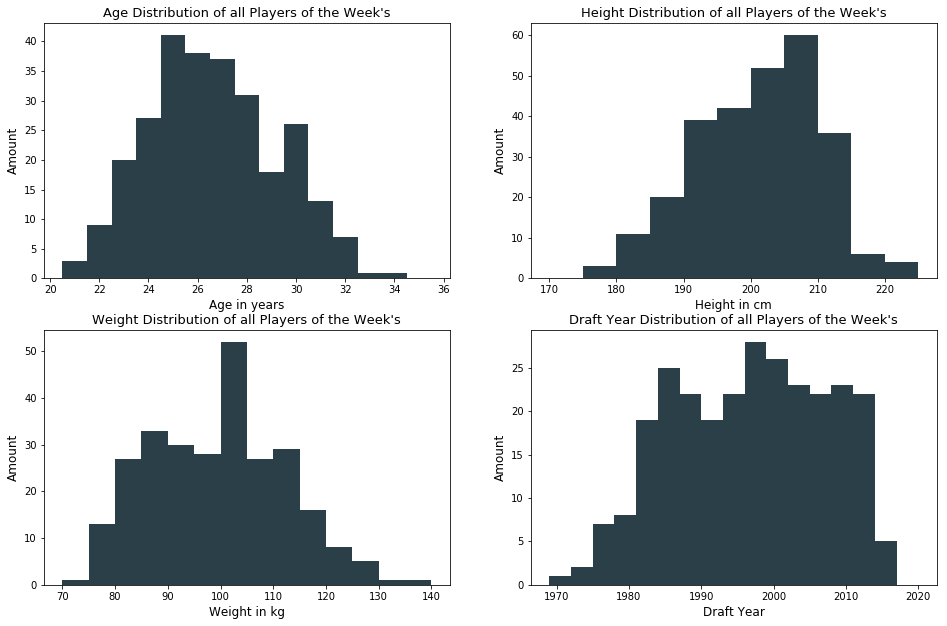

In [20]:
# plot the distributions
plt.figure(figsize= [16, 8])
subplots(df2, 1, 'Age', 'Age in years', 20.5, 35.5, 1)
subplots(df2, 2, 'Height', 'Height in cm', 170, 225, 5)
subplots(df2, 3, 'Weight', 'Weight in kg', 70, 140, 5)
subplots(df2, 4, 'Draft Year', 'Draft Year', 1969, 2018, 3);

<a id="pos"></a>
# Distribution of Positions
By looking at the chart below, it is clear that Guards (G) have been awarded 'Player of the Week' the most times from 1985 to 2018, while Guard-forwards (GF) have been awarded the least times.

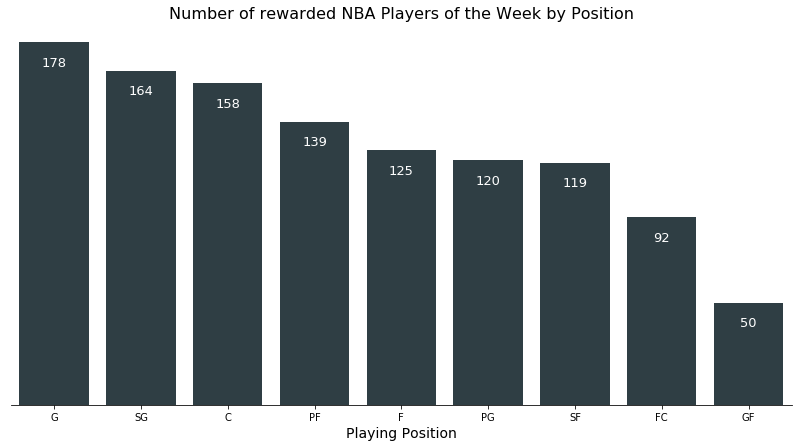

In [21]:
# Clean inconsistent Position values
df['Position'] = df['Position'].str.replace('F-C', 'FC')
df['Position'] = df['Position'].str.replace('G-F', 'GF')

# position distribution of all 
order = df['Position'].value_counts().index.values
plt.figure(figsize= [14, 7])
plt.gca().axes.get_yaxis().set_visible(False)
sb.despine(left=True, top=True, right=True)
plt.title('Number of rewarded NBA Players of the Week by Position',  fontdict={'size':16})
splot = sb.countplot(data=df, x='Position', color='#2b3f48', order=order)
plt.xlabel('Playing Position', size=14)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, -20), textcoords = 'offset points', color = 'w', size=13);

<a id='relations'></a>
# What are the Relations?
In this step, I looked deeper into the relations between different variables. An interesting question would be, which position had which individual features (e.g. height, weight, age) to be awarded. Is there a difference in the draft years in terms of the number of positions that have been awarded?


## Weight to Height Relation
The Pearson Correlation Coefficient of 0.826 indicated a strong relation of weight to height. It is very useful to combine these features into one ratio for further analysis. The body mass index (bmi) ratio for each player is specified in the next step.

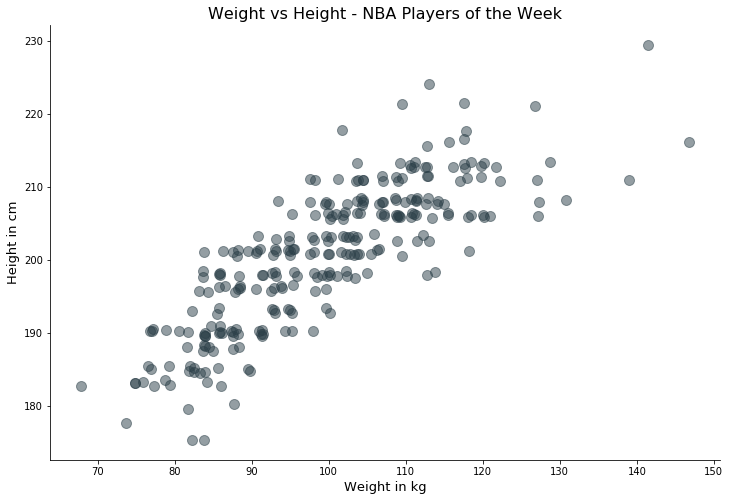

In [22]:
# Scatterplot for Weight to Height
plt.figure(figsize=[12,8])
plt.title('Weight vs Height - NBA Players of the Week',  fontdict={'size':16})
sb.despine()
sb.regplot(data = df2, x = 'Weight', y = 'Height', fit_reg=False,
           x_jitter = 0.5, y_jitter = 0.5, color='#2b3f48', scatter_kws = {'alpha': 0.5, 's':100})
plt.xlabel('Weight in kg', size=13)
plt.ylabel('Height in cm', size=13);

In [23]:
# the Pearson Correlation Coefficient
np.corrcoef(df2['Weight'], df2['Height'])

array([[1.        , 0.82652989],
       [0.82652989, 1.        ]])

In [24]:
# generates the bmi
df['bmi'] = df['Weight'] / (df['Height']/100)**2
df2['bmi'] = df2['Weight'] / (df2['Height']/100)**2

<a id="bmi"></a>
# BMI by Position
By setting each players bmi's in relation to their positions, a distinct pattern for each position is revealed. While the median bmi for awarded Shooting-Guards (SG) is about 24, the top performing Forward-Centers (FC) have a higher middle bmi of about 26, which means that the median player has more weight per height. The bmi count is narrower and therefore wider distributed for Centers (C) and Power-Forwards (PF) than for Guards (G) or Guard-Forwards (GF).

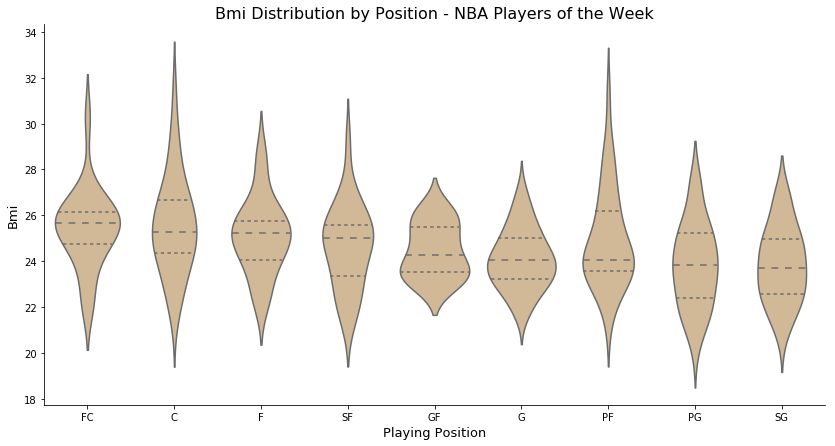

In [25]:
# Clean inconsistent Position values
df2['Position'] = df2['Position'].str.replace('F-C', 'FC')
df2['Position'] = df2['Position'].str.replace('G-F', 'GF')

# Creates a violin plot ordered by the median
orders = df2.groupby('Position')['bmi'].median().sort_values(ascending=False).index.values
plt.figure(figsize=[14, 7])
sb.violinplot(data = df2, x = 'Position', y = 'bmi', order=orders, color='#dbbb8d', inner = 'quartile')
sb.despine()
plt.title('Bmi Distribution by Position - NBA Players of the Week', fontdict={'size':16})
plt.xlabel('Playing Position', size=13)
plt.ylabel('Bmi', size=13);

<a id='multi'></a>
# How does these relations change over time?
Are there any changes regarding the height and weight of the PotW throughout the years? What about the bmi distributions for each Position?

<a id="weightheight"></a>
# Players Weight on Height by Years
From the visualization below, one can see that players that have been drafted more recently had higher weight on height ratios (or higher bmi's), because they tend to be south of the (imaginary) regression line.

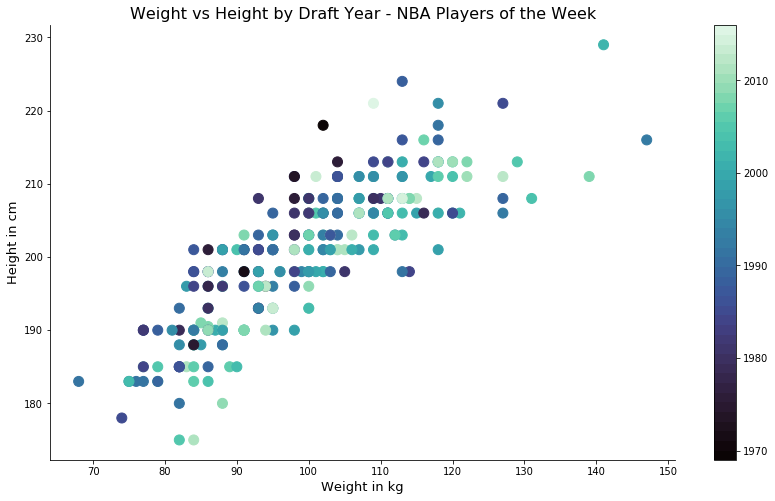

In [26]:
# creates a 3 dimensional scatter plot
plt.figure(figsize=[14,8])
cmap = plt.get_cmap('mako', df2['Draft Year'].nunique())
plt.scatter(data = df2, x = 'Weight', y = 'Height', c = 'Draft Year', cmap=cmap, s=100)
sb.despine()
plt.colorbar()
plt.title('Weight vs Height by Draft Year - NBA Players of the Week', fontdict={'size': 16})
plt.xlabel('Weight in kg', size=13)
plt.ylabel('Height in cm', size=13);

## Regression Line for BMI over Draft Year
The regression line shows a weak positive relation for bmi over draft years. It indicates that the top player bmi's have increased over time, meaning that they have on average gained on weight over height. This statement is in line with the previous assumption from the multivariate plot.

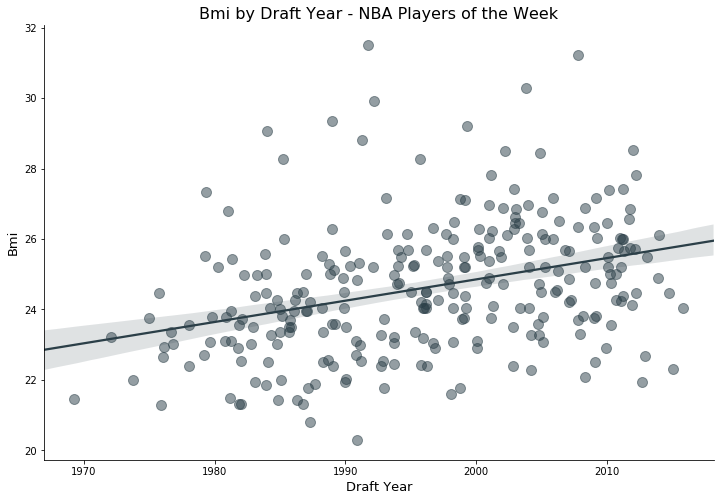

In [27]:
# creates a scatter plot with regression line
plt.figure(figsize=[12,8])
sb.regplot(data=df2, x='Draft Year', y='bmi', scatter_kws={'alpha': 0.5, 's': 100}, color='#2b3f48', x_jitter=1/3)
sb.despine()
plt.title('Bmi by Draft Year - NBA Players of the Week', fontdict={'size':16})
plt.xlabel('Draft Year', size=13)
plt.ylabel('Bmi', size=13);

In [28]:
# Pearson Correlation Coefficient Matrice
np.corrcoef(df2['Draft Year'], df2['bmi'])

array([[1.        , 0.34386751],
       [0.34386751, 1.        ]])

In [29]:
# binning Draft Years into intervals
df2['draft_bin'] = ['1969-1989' if i <= 1989
                     else '1990-2009' if i <= 2009
                     else '2010-2018' for i in df2['Draft Year']]

<a id="bmitime"></a>
# BMI Distribution for each Position over Time
The changes of bmi over time for each player of the week's position over time reveals some very interesting insights. Despite the overall trend of higher bmi's for the top performing players, the BMI 10 year average of Forwards (F), Centers (C), and Forward-Centers have actually decreased for players have been drafted more recently.

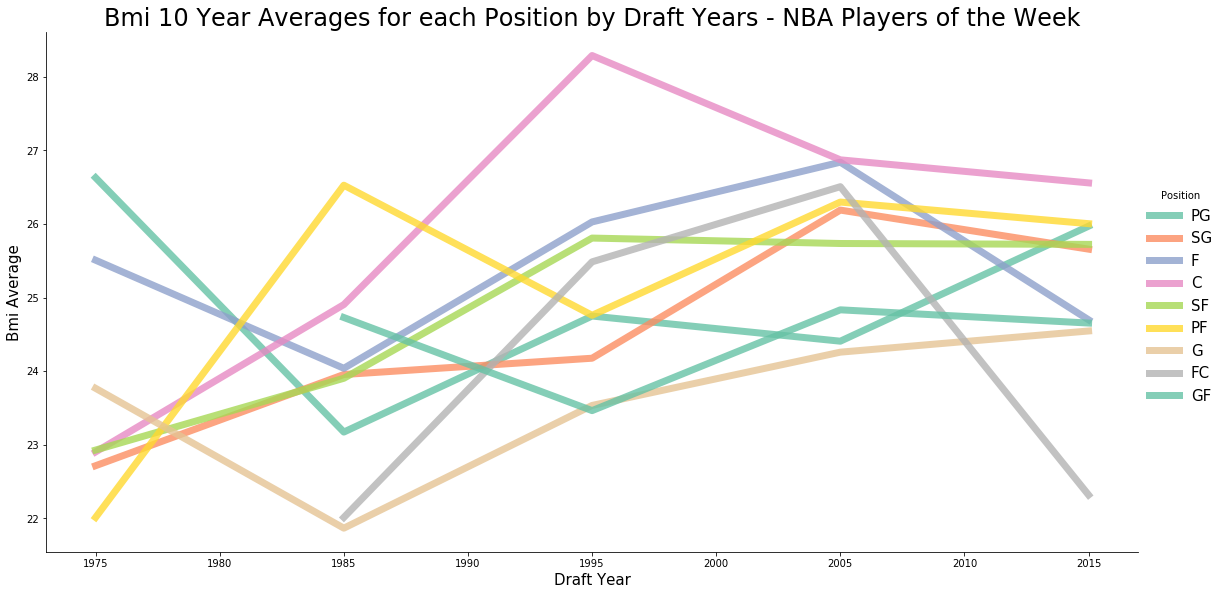

In [30]:
def mean_poly(x, y, bins = 10, **kwargs):
    """ Custom adapted line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    means = y.groupby(data_bins).mean()

    # create plot
    plt.errorbar(x = bin_centers, y = means, **kwargs)

bin_edges = np.arange(1970, df['Draft Year'].max()+10, 10)
g = sb.FacetGrid(data = df, hue = 'Position', palette='Set2', size = 8, aspect=2)
g.map(mean_poly, "Draft Year", "bmi", linewidth=7, alpha=0.8, bins = bin_edges)
g.set_ylabels('mean(bmi)')
g.add_legend(fontsize=15)
g.set_xlabels('Draft Year', fontsize=15)
g.set_ylabels('Bmi Average', fontsize=15)
plt.title('Bmi 10 Year Averages for each Position by Draft Years - NBA Players of the Week', fontsize=24);

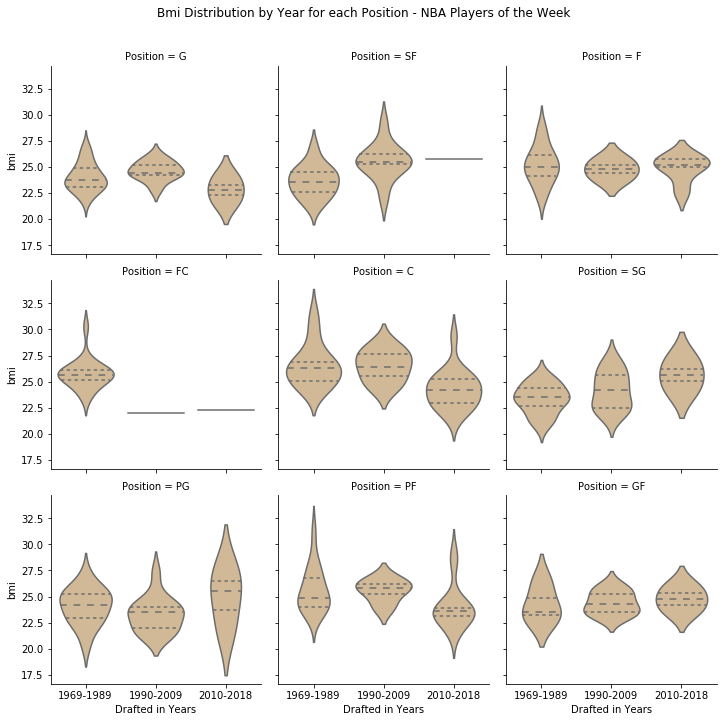

In [31]:
# Creates a facet grid with a violin plot for each position
g = sb.FacetGrid(data = df2, col = 'Position', col_wrap=3, size=3.4)
g.map(sb.violinplot, 'draft_bin', 'bmi', color='#dbbb8d', inner = 'quartile')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Bmi Distribution by Year for each Position - NBA Players of the Week')
g.set_xlabels('Drafted in Years');

<a id="con"></a>
# Conclusion

The visual exploration of the dataset revealed, that players in the position of a guard have been chosen the most times as 'Player of the Week' in the NBA. 

The body mass index (bmi) of each awarded player have been the highest on average for Forward-Centers and the lowest on average for Shooting-Guards. 

Players that have been drafted more recently tend to have a higher bmi on average than players that have been drafted 10-50 years ago.

Despite the overall trend of higher bmi's for the top performing players, the BMI 10 year average of Forwards (F), Centers (C), and Forward-Centers have actually decreased for players have been drafted more recently.